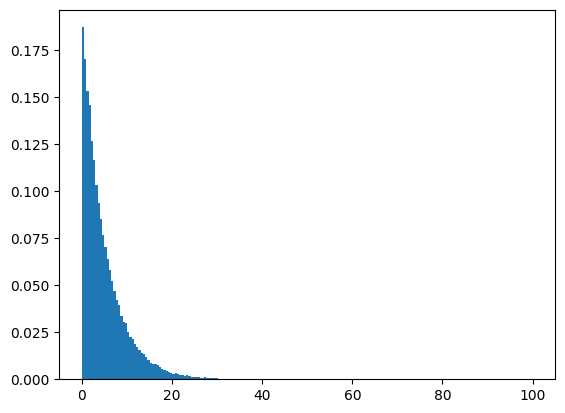

<Figure size 640x480 with 0 Axes>

In [405]:
import numpy as np
import matplotlib.pyplot as plt



def random_exp(p):
    return np.log(1-np.random.rand())*(1/-p)

#plotando a exponencial acima:

x = [random_exp(1/5) for i in range(0,100000)]
n,bins,patches = plt.hist(x,np.linspace(0,100,200),density=True)
plt.show()
plt.clf()


c = 1.875


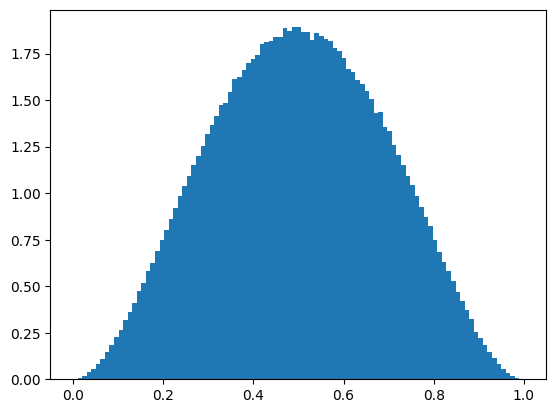

In [406]:

#exercicio 4.1
# fdp
def fx(x):
    return 30*(x**2 -2*(x**3) + x**4)
# achar 0 da derivada, para determinar c
def find_zero(f,a,b):
    while( (a-b)**2 > 0.0001):
        c = (a+b)/2
        test = f(a) * f(c)
        if( test > 0 ):
            a = c
        elif( test < 0):
            b = c
        else:
            return c
    return c
#determinando c

def gen_va(n):
    dx = lambda x: (x-3*(x**2)+2*(x**3))
    c = fx(find_zero(dx,0,1))
    print("c =",c)
    array = []
    for i in range(0,n):
        while(True):
            j = np.random.rand()
            if( np.random.rand() < fx(j)/c ):
                array.append(j)
                break
    array.sort()
    return array

vars = gen_va(999909)
n,bins,patches = plt.hist(vars,np.linspace(0,1,100),density=True)


[1.0299212787697132, 2.2215130390996864, 1.1031011684525376, 2.8439183076233645, 1.1213468812260718]


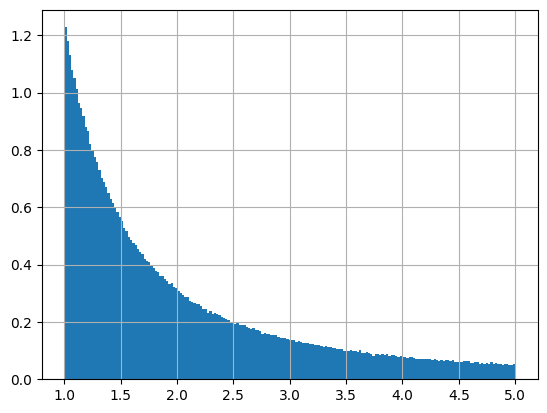

In [407]:
#exercicio 4.2

def va(n):
    array = []
    for i in range(0,n):
        u = np.random.rand()
        array.append(1/( 1 - ((4*u)/5) ))
    return array

print(va(5))
vars = va(1000000)
n,bins,patches = plt.hist(vars,np.linspace(1,5,200),density=True)
plt.grid()

In [408]:
class Job:
    def __init__(self,size,arrival,end):
        self.size=size
        self.arrival=arrival
        self.end = end
        self.response = end-arrival
        self.q_time = self.response - size

class QueueRun:
    def __init__(self,exp_param_arrival,exp_param_jobsize,n_jobs):
        jobs = []
        arrivals = []
        response_times = []
        sizes = []
        q_times = []
        #first job
        first_js = random_exp(exp_param_jobsize)
        jobs.append( Job(first_js,0,first_js ))

        #creating each job accordingly to the last
        for i in range(1,n_jobs):
            size = random_exp(exp_param_jobsize)
            arrival = jobs[-1].arrival + random_exp(exp_param_arrival)
            if arrival<jobs[-1].end:
                end = jobs[-1].end + size;
            else:
                end = arrival + size
            j = Job(size,arrival,end)
            jobs.append(j)
            
            arrivals.append(j.arrival - jobs[-2].arrival)
            response_times.append(j.response)
            sizes.append(j.size)
            q_times.append(j.q_time)
        self.job_sizes = sizes
        self.response_times = response_times
        self.jobs = jobs
        self.q_times = q_times
        self.arrivals = arrivals
        self.mean_t = np.mean(response_times)
        self.utilization = np.sum(sizes)/jobs[-1].end
        self.throughput = n_jobs/jobs[-1].end
        self.mean_js = np.mean(sizes)
        self.mi = 1/self.mean_js
        self.mean_interarrival = np.mean(arrivals)
        self.lambd= 1/self.mean_interarrival


In [409]:
#getting 3 runs with different loads
runs = []
loads = [0.5,0.7,0.9]
for load in [0.5,0.7,0.9]:
    runs.append(QueueRun(load,1,2000))
for i in range(0,3):
    print("Mean response time in run with load = {}:   {}".format(loads[i],runs[i].mean_t)) 
    print("\t utilization ={}".format(runs[i].utilization))
    print("\t throughput = {}".format(runs[i].throughput))
    print("\t mi = ", runs[i].mi)
    print("\t arrival rate = ", runs[i].lambd)


Mean response time in run with load = 0.5:   2.069749202569534
	 utilization =0.49998348308588986
	 throughput = 0.5087104803300203
	 mi =  1.0169458437940238
	 arrival rate =  0.5086037970191436
Mean response time in run with load = 0.7:   3.8750679368708405
	 utilization =0.7274886967665632
	 throughput = 0.7076604019304378
	 mi =  0.9722578163388746
	 arrival rate =  0.7088459740620868
Mean response time in run with load = 0.9:   11.646723829992464
	 utilization =0.9325582222346955
	 throughput = 0.9186273512253703
	 mi =  0.9845691300105053
	 arrival rate =  0.9310317993528062


In [410]:
#averaging response time of 2001th job.

p_size = 1
p_arriv = 0.5
runs = [QueueRun(p_arriv,p_size,2000) for i in range(0,200)]
last_job_resp_times = []
for run in runs:
    #generating 2001th job
    arrival = run.jobs[-1].arrival + random_exp(p_arriv)
    size = random_exp(p_size)
    if arrival<run.jobs[-1].end:
        end = run.jobs[-1].end + size;
    else:
        end = arrival + size
    last_job_resp_times.append(end-arrival)

print("Mean of response time of 2001th jobs: {}".format(np.mean(last_job_resp_times)))

Mean of response time of 2001th jobs: 2.1011103301018195
